In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data Collection

In [2]:
entry_data = pd.read_csv("https://www.immd.gov.hk/opendata/eng/transport/immigration_clearance/statistics_on_daily_passenger_traffic.csv")

In [3]:
entry_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46736 entries, 0 to 46735
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 46736 non-null  object 
 1   Control Point        46736 non-null  object 
 2   Arrival / Departure  46736 non-null  object 
 3   Hong Kong Residents  46736 non-null  int64  
 4   Mainland Visitors    46736 non-null  int64  
 5   Other Visitors       46736 non-null  int64  
 6   Total                46736 non-null  int64  
 7   Unnamed: 7           0 non-null      float64
dtypes: float64(1), int64(4), object(3)
memory usage: 2.9+ MB


# Data Preprocessing & Cleaning

In [4]:
entry_data.drop(columns=["Unnamed: 7"], inplace=True)

In [5]:
entry_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46736 entries, 0 to 46735
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 46736 non-null  object
 1   Control Point        46736 non-null  object
 2   Arrival / Departure  46736 non-null  object
 3   Hong Kong Residents  46736 non-null  int64 
 4   Mainland Visitors    46736 non-null  int64 
 5   Other Visitors       46736 non-null  int64 
 6   Total                46736 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 2.5+ MB


In [6]:
entry_data.duplicated().sum()

0

In [7]:
entry_data.isna().sum()

Date                   0
Control Point          0
Arrival / Departure    0
Hong Kong Residents    0
Mainland Visitors      0
Other Visitors         0
Total                  0
dtype: int64

In [8]:
entry_data["Date"] = pd.to_datetime(entry_data["Date"], format="%d-%m-%Y")

# Exploratory Data Analysis (EDA)

In [9]:
sns.set_style("whitegrid", {
    "grid.linestyle": "--",
    "grid.alpha": 0.6}) 

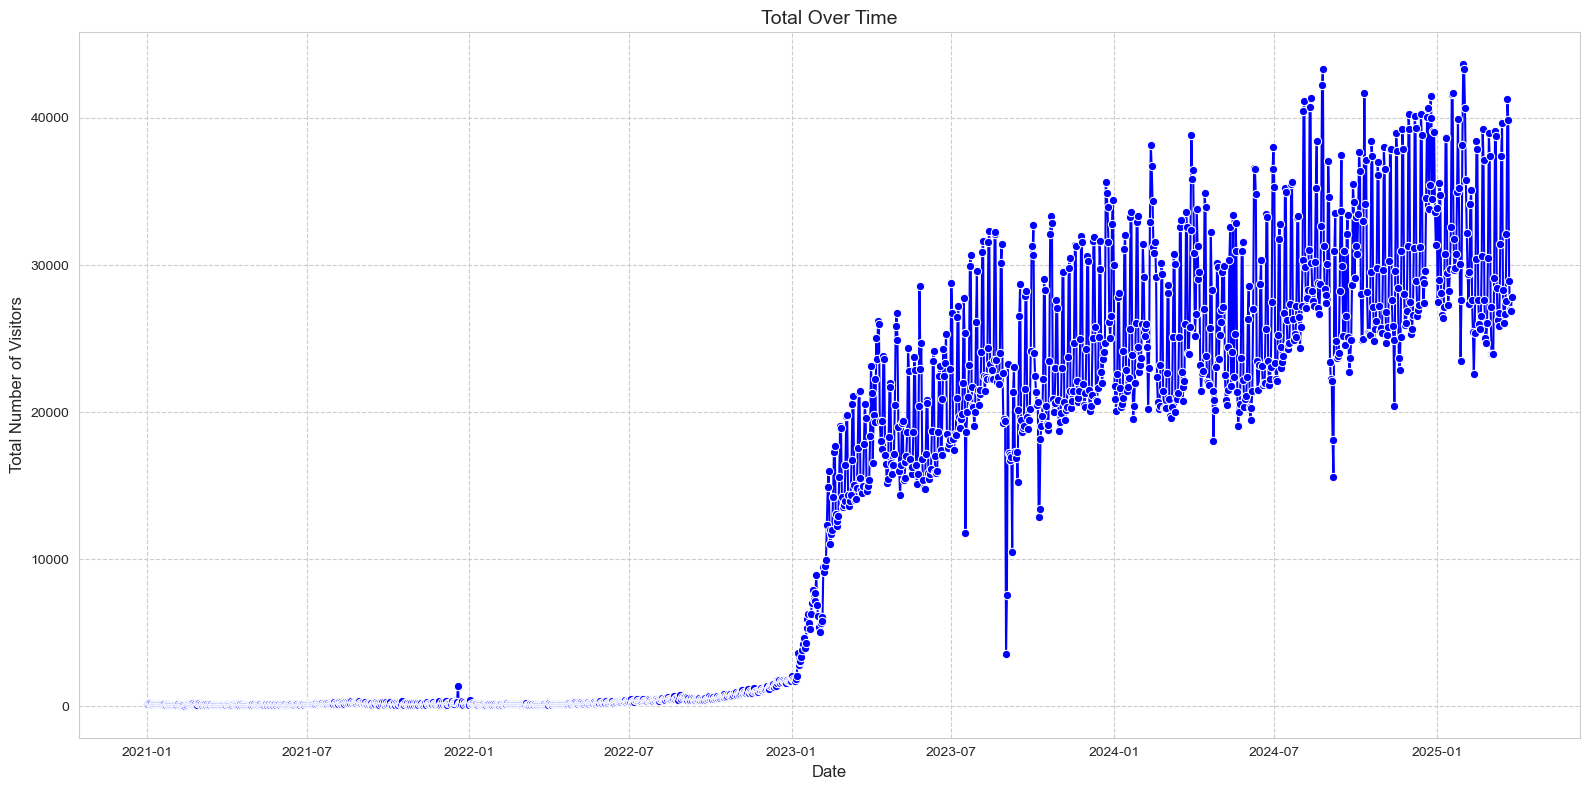

In [10]:
plt.figure(figsize=(16, 8))
sns.lineplot(data=entry_data, x="Date", y="Total", marker="o", color="b", errorbar=None)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Number of Visitors", fontsize=12)
plt.title("Total Over Time", fontsize=14)
plt.tight_layout()
plt.show();

In [11]:
monthly_data = entry_data.resample("ME", on="Date")["Hong Kong Residents","Mainland Visitors", "Other Visitors", "Total"].mean().round(0).reset_index()
monthly_data

,Date,Hong Kong Residents,Mainland Visitors,Other Visitors,Total
0,2021-01-31,126.0,7.0,2.0,135.0
1,2021-02-28,115.0,6.0,2.0,123.0
2,2021-03-31,102.0,8.0,2.0,112.0
3,2021-04-30,102.0,7.0,2.0,111.0
4,2021-05-31,106.0,7.0,2.0,115.0
5,2021-06-30,114.0,9.0,2.0,125.0
6,2021-07-31,161.0,12.0,2.0,174.0
7,2021-08-31,228.0,12.0,2.0,242.0
8,2021-09-30,181.0,11.0,3.0,195.0
9,2021-10-31,163.0,11.0,3.0,177.0


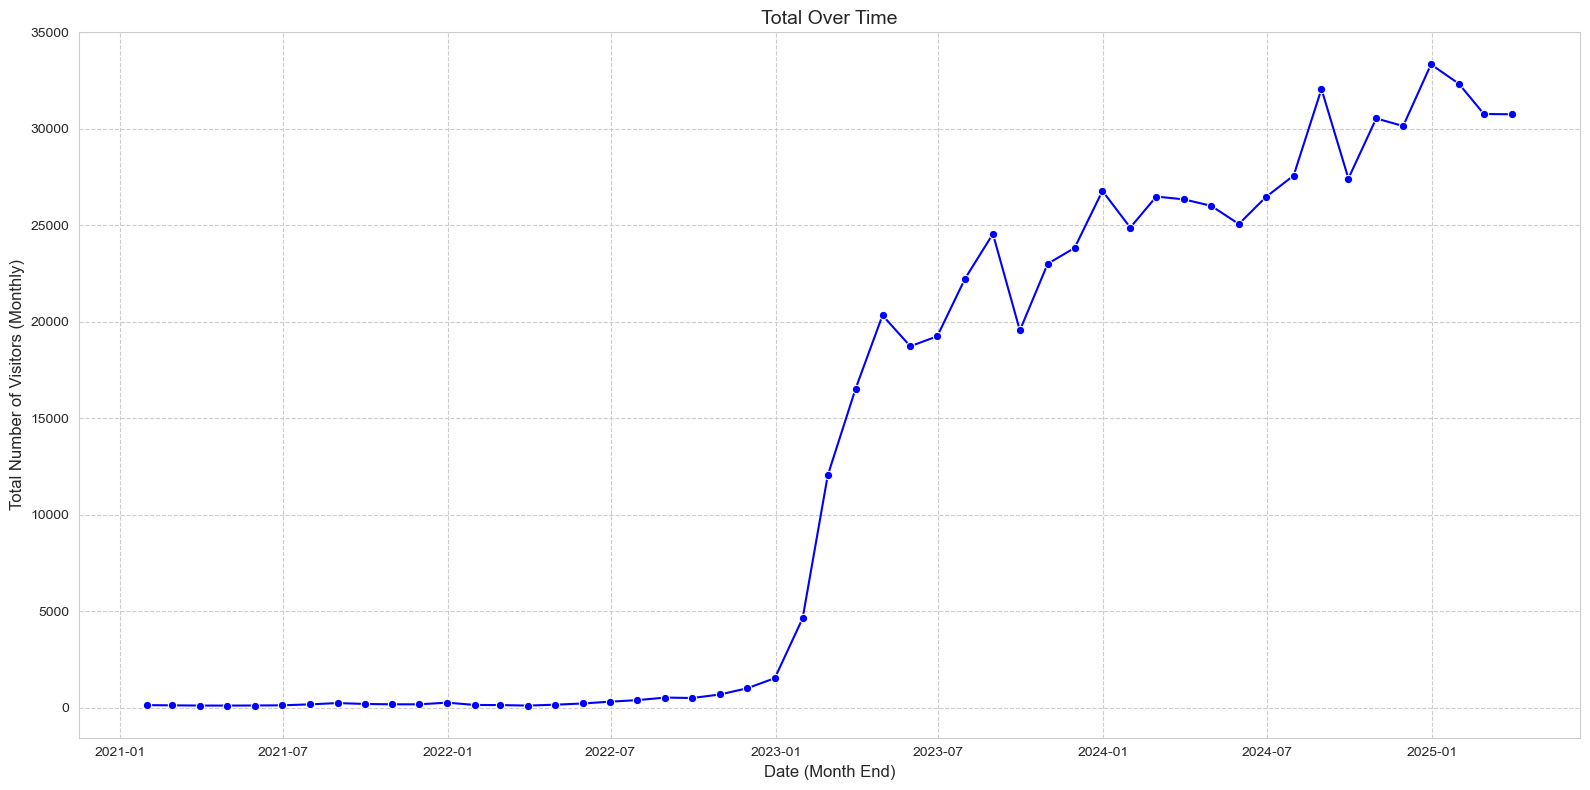

In [12]:
plt.figure(figsize=(16, 8))
sns.lineplot(data=monthly_data, x= "Date", y="Total", marker="o", color="b", errorbar=None)
plt.xlabel("Date (Month End)", fontsize=12)
plt.ylabel("Total Number of Visitors (Monthly)", fontsize=12)
plt.title("Total Over Time", fontsize=14)
plt.tight_layout()
plt.show();

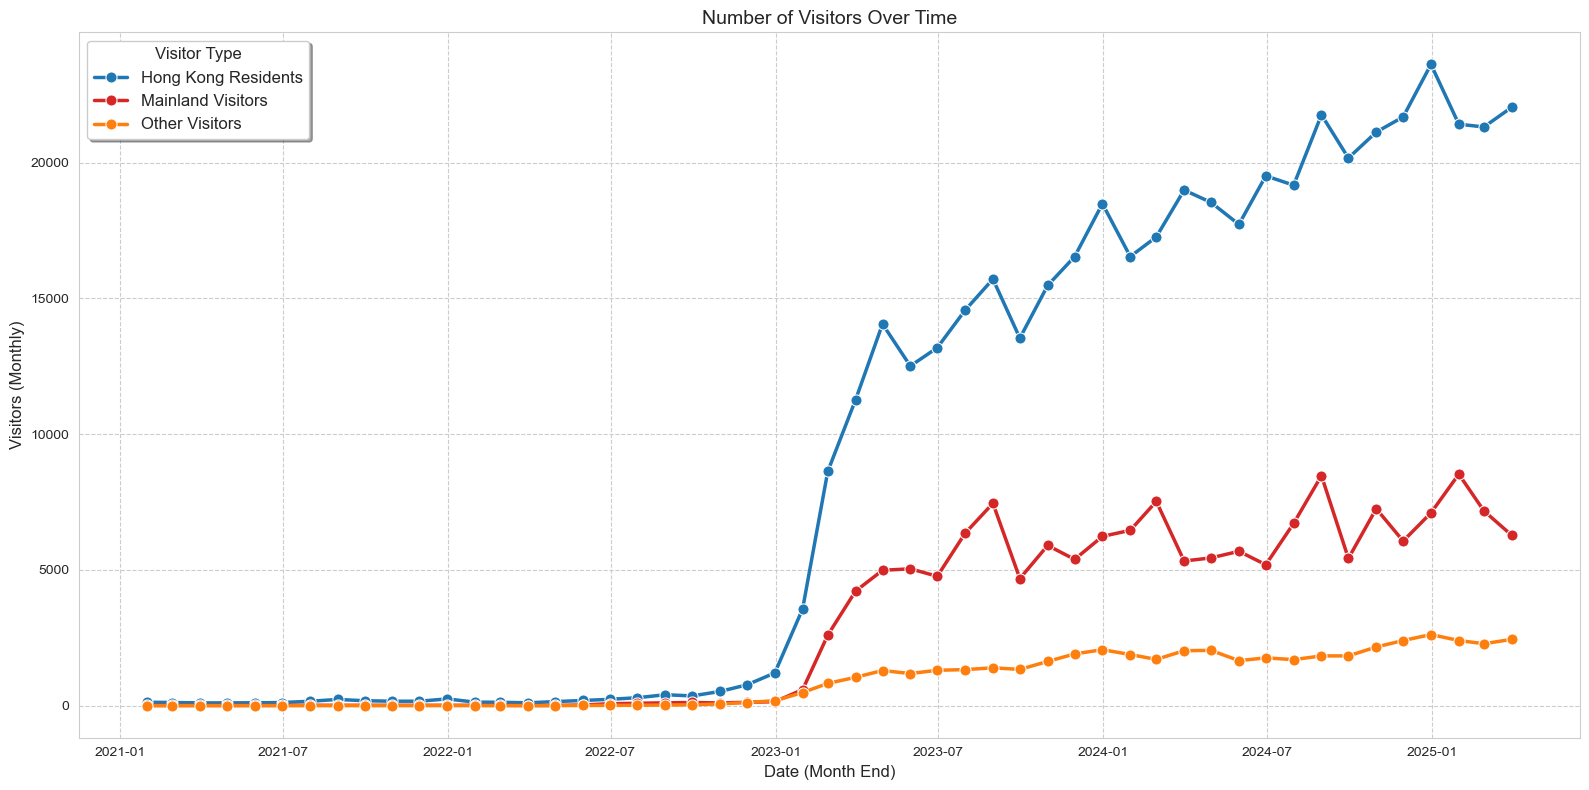

In [13]:
plt.figure(figsize=(16, 8))
color_palette = {"Hong Kong Residents": "#1f77b4",
                 "Mainland Visitors": "#d62728",    
                 "Other Visitors": "#ff7f0e"}

for column, color in color_palette.items():
    sns.lineplot(data=monthly_data, x="Date", y=column, marker="o", color=color, errorbar=None, linewidth=2.5, markersize=8, label=column)
    
plt.xlabel("Date (Month End)", fontsize=12)
plt.ylabel("Visitors (Monthly)", fontsize=12)
plt.title("Number of Visitors Over Time", fontsize=14)

legend = plt.legend(fontsize=12, framealpha=1, shadow=True, facecolor="white", bbox_to_anchor=(0, 1), loc="upper left")
legend.set_title("Visitor Type", prop={"size": 12})

plt.tight_layout()
plt.show();